# Results


|   |   |
|---|---|
|Best Model| **XGBoost**|
|Preprocessing| **None**|
| R^2| **0.931** |
| MSE | **78.09** |
| Model Parameters | n_estimators: 450 <br> learning_rate: 0.15 <br> max_depth: 6 <br> min_child_weight: 3 <br> gamma: 0.5 <br> subsample: 1.0 <br> colsample_bytree: 1.0 <br> reg_lambda: 1.0 <br> reg_alpha: 0.1 <br> |

---
---
## Linear Regression

|   | Best Configuration  |
|---|---|
|Preprocessing| **MinMaxScaling**|
| R^2| **0.754** |
| MSE | **280.11** |

#### Relevant Observations:
- Removing features, via PCA or the highly correlated ones, degrades the performaces of the model

| R^2  | Description  |
|---|---|
| 0.75 | StandardScaling, no preprocessing |
| 0.73 | Only Properties dataset |
| 0.70 | Removing  highly correlated features with ***threshold: >0.85*** |
| 0.62 | PCA with ***threshold: 0.95*** |
| 0.59 | Only Formula dataset |
| 0.59 | PCA with ***threshold: 0.85*** |


---
---
## Random Forest

|   |  Best Configuration |
|---|---|
|Preprocessing| **Removing the highly correlated features + Normalization Max + MinMaxScaling**|
| R^2| **0.928** |
| MSE | **82.13** |
| Parameters: | max_samples: 0.66 <br> n_estimators: 200 <br> max_depth: 25 <br> max_features: 0.6 <br> ccp_alpha: 0 <br> **corr_threshold: 0.99**|

#### Relevant Observations:

- The best configuration, with **corr_threshold: 0.99**, has only 5 features removed, remaining a total of 162 features. In fact, almost identical results are obtained without removing those features.
- Looking at the ***max_features*** parameter, each one of the best configurations has a different value
- Looking at the ***max_depth*** parameter, the model generally performs better with values between 25 and 35

| R^2  | Description  |
|---|---|
| 0.92 | No preprocessing and with ***max_depth: >15*** <br> StandardScaling <br> Only Properties <br> Only Formula with ***max_samples: 0.66*** <br> Removing highly correlated features with ***threshold: >0.85*** |
| 0.90 | PCA and with ***ccp_alpha: 0.1*** |
| 0.85 | PCA and with ***ccp_alpha: 0***  |
| 0.82 | No preprocessing and with ***max_depth: 5*** |

---
---
## XGBoost

|   |  Best Configuration |
|---|---|
|Preprocessing| **Nothing**|
| R^2| **0.931** |
| MSE | **78.09** |
| Parameters: | n_estimators: 450 <br> learning_rate: 0.15 <br> max_depth: 6 <br> min_child_weight: 3 <br> gamma: 0.5 <br> subsample: 1.0 <br> colsample_bytree: 1.0 <br> reg_lambda: 1.0 <br> reg_alpha: 0.1 <br> |

#### Relevant Observations:
- The model alone has the best outcome, but it was needed a fine parameter tuning. The same results can be obtained with the 'classical' preprocessing.
- Each preprocess technique vary a lot the result, mainly depending on the XGBoost parameters
- In general, it appears that more ***subsampling*** and more ***column sampling*** gives better results
- The default ***max_depth: 6*** is the best option
- Varying the ***learning_rate*** between 0.15 and 0.20 gives the best results


| R^2  | Description  |
|---|---|
| 0.93 | MinMaxScaling <br> StandardScaling |
| 0.92 | Only Formula <br> Only Properties <br> Removing high correlated features|
| 0.91 | StandardScaling + PCA |

---
---
## KNN

|   |  Best Configuration |
|---|---|
|Preprocessing| **Removing the highly correlated features + Normalization Max + MinMaxScaling**|
| R^2| **0.920** |
| MSE | **91.17** |
| Parameters: | n_neighbors: 5 <br> weights: distance <br> metric: cityblock <br> corr_threshold: 0.95 |

#### Relevant Observations:

- Each preprocess technique vary a lot the result, mainly depending on the KNN parameters
- The best configuration, with **corr_threshold: 0.95**, has only 5 features removed, remaining a total of 162 features. In fact, almost identical results are obtained without removing those features.
- The best ***n_neighbors*** is around 6
- The cosine and cityblocks are the best ***metrics***
- The distance ***weight*** is farmost the best option

| R^2  | Description  |
|---|---|
| 0.92 | MinMaxScaling <br> StandardScaling <br> Only Formula <br> Removing high correlated features|
| 0.91 | StandardScaling + PCA |
| 0.90 | Only Properties <br> No preprocessing|

---
---
## SVR

|   |  Best Configuration |
|---|---|
|Preprocessing| **Removing the highly correlated features + StandardScaling**|
| R^2| **0.785** |
| MSE | **244.465** |
| Parameters: | kernel: rbf <br> epsilon: 1 <br> tol: 0.1 <br> C: 1 <br> max_iter: 100000 <br> corr_threshold: 0.99 |

#### Relevant Observations:

- Plain SVR with the wrong parameters can result in R2=-22000 or worse
- Each preprocess technique vary a lot the result, mainly depending on the SVR parameters
- The best configuration, with **corr_threshold: 0.99**, has only 5 features removed, remaining a total of 162 features. In fact, almost identical results are obtained without removing those features.
- The real gamechanger is the StandardScaling
- The best ***n_neighbors*** is around 6
- The cosine and cityblocks are the best ***metrics***
- The distance ***weight*** is farmost the best option

| R^2  | Description  |
|---|---|
| 0.78 | StandardScaling <br> StandardScaling + PCA |
| 0.76 | MinMaxScaling |
| 0.71 | Only Formula |
| 0.68 | Removing high correlated features + MinMaxScaler |
| 0.45 | Only Properties |
| < 0.45 | No preprocessing |

---
---
# Features Importance
- The following heatmap displays:
    - the *coefficients* of the Linear Regression model
    - the *feature importance* based on *mean decrease in impurity*, of Random Forest and XGBoost models
    - the *feature importance* based on *feature permutation*, of Random Forest and XGBoost models
- It's important to remember that these measures (except the LR coefficients) do not necessarily imply a causal relationship between the features and the target. They only capture the patterns learned by the model from the data.
- The most "important" features are both elements (features from Formula dataset) and properties (from the Properties dataset): ***Cu, Ca, Ba, O, range_ThermalConductivity, Valence, ...***
- For the LR coefficients, are displayed also the most negative features (the full map is available in [2_Features_Importance](https://github.com/RiccardoEvangelisti/Evangelisti-Critical-temperature-of-superconductors/blob/main/2_Features_Importance.ipynb) notebook)


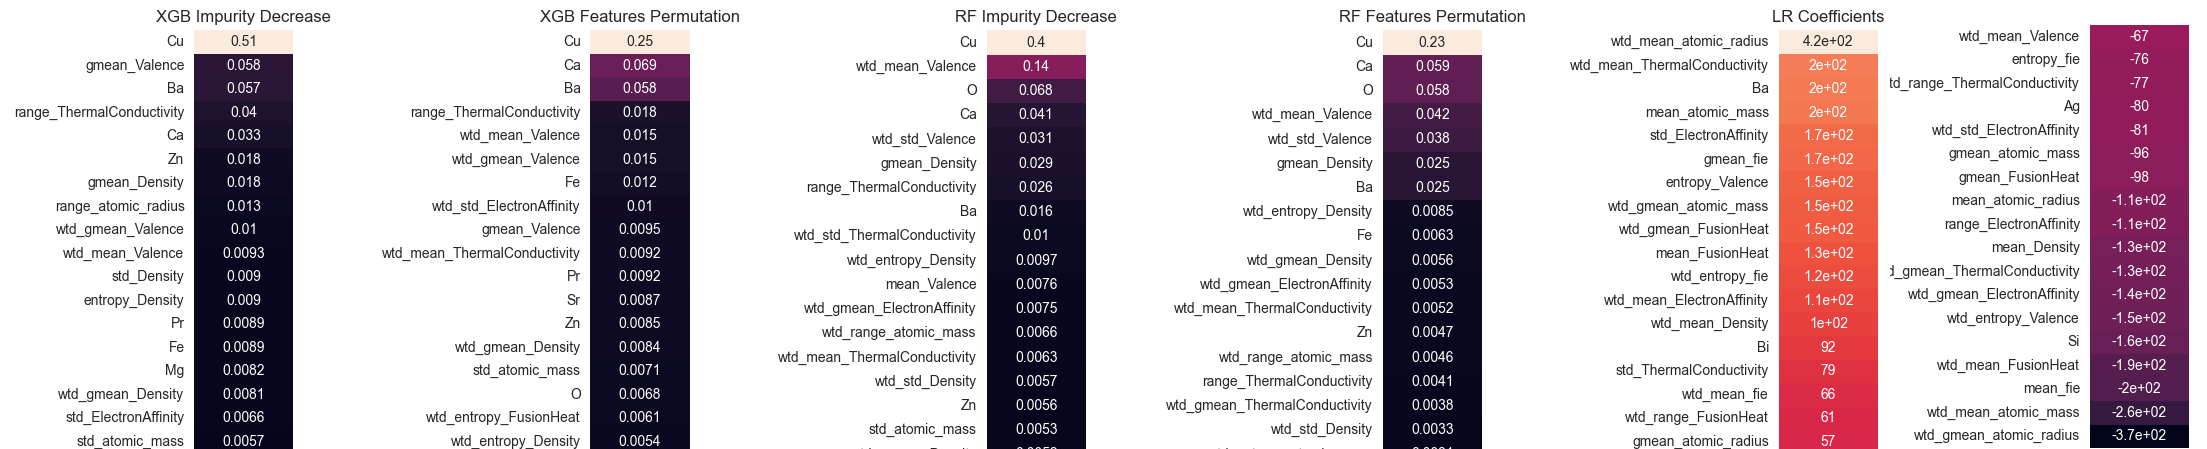